In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## Reading the 'paths_finished.tsv' file as a pandas dataframe
PATH_IN = './data/'
fname = os.path.join(PATH_IN, 'wikispeedia_paths-and-graph/paths_finished.tsv')
df = pd.read_csv(fname, sep = '\t', comment = '#', header = None, names = ['hashedIpAddress','timestamp','durationInSec','path','rating'],encoding = 'UTF-8')
df

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [3]:
## count the steps in each path(containing return)

df.loc[:,'steps'] = df.apply(lambda x:x.path.count(';'),axis = 1)
df

,hashedIpAddress,timestamp,durationInSec,path,rating,steps
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,8
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,4
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,7
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,3
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,6
...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN,2
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,8
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN,6
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0,3


In [4]:
## count steps

steps_values = df['steps'].value_counts(sort = True)
steps_values

4     10941
3      8558
5      8137
6      5868
7      3954
      ...  
71        1
85        1
70        1
65        1
68        1
Name: steps, Length: 79, dtype: int64

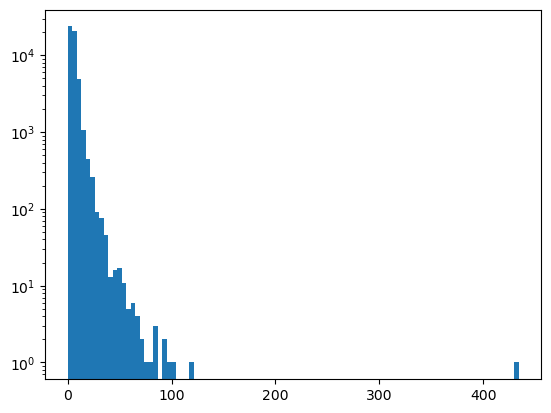

In [5]:
plt.hist(df.steps, 100)
plt.yscale('log')
plt.show()

In [6]:
# the start is the end
df[df.steps == 0]

,hashedIpAddress,timestamp,durationInSec,path,rating,steps
5857,43f864c75b2571b5,1350587401,0,Lesotho,NaN,0
9589,5590014e126275b4,1225696755,0,Moon,NaN,0
9872,43f864c75b2571b5,1350587395,0,Coal,NaN,0
20919,43f864c75b2571b5,1350587389,0,Pyramid,NaN,0
23347,321e4b101c5b58ff,1225726660,0,Apple,NaN,0
24326,43f864c75b2571b5,1350587377,0,Snow_Goose,NaN,0
30761,43f864c75b2571b5,1350587420,0,Royal_Navy,NaN,0
33832,43f864c75b2571b5,1350587367,0,Abel_Tasman,NaN,0
34302,43f864c75b2571b5,1350587407,0,American_Samoa,NaN,0
38927,43f864c75b2571b5,1350587383,0,Florence_Nightingale,NaN,0


In [7]:
## Is rating related to steps?

# use only data with rating
df_rate = df[df['rating']>0]
df_rate

,hashedIpAddress,timestamp,durationInSec,path,rating,steps
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,4
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,6
6,36dabfa133b20e3c,1249525912,112,14th_century;China;Gunpowder;Fire,2.0,3
7,20418ff4797f96be,1229188046,139,14th_century;Time;Isaac_Newton;Light;Color;Rai...,1.0,5
8,08888b1b428dd90e,1232241510,74,14th_century;Time;Light;Rainbow,3.0,3
...,...,...,...,...,...,...
51310,55150dce4acb74c8,1340891297,117,Women%27s_rights;Property;Clothing;Weather;Autumn,5.0,4
51311,4753cde919cd5ce5,1348670636,418,Work_%28thermodynamics%29;Energy;Aristotle;Poe...,3.0,12
51312,052ba30a41ff5a05,1371787558,133,Work_%28thermodynamics%29;Cambridge;City_statu...,3.0,6
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,8


Average steps for each rating
rating = 1
number: 8542 mean: 3.6661203465230625
rating = 2
number: 8792 mean: 5.001592356687898
rating = 3
number: 7261 mean: 6.645503374190882
rating = 4
number: 2748 mean: 9.08296943231441
rating = 5
number: 1158 mean: 12.296200345423143


<AxesSubplot:title={'center':'steps'}, xlabel='[rating]'>

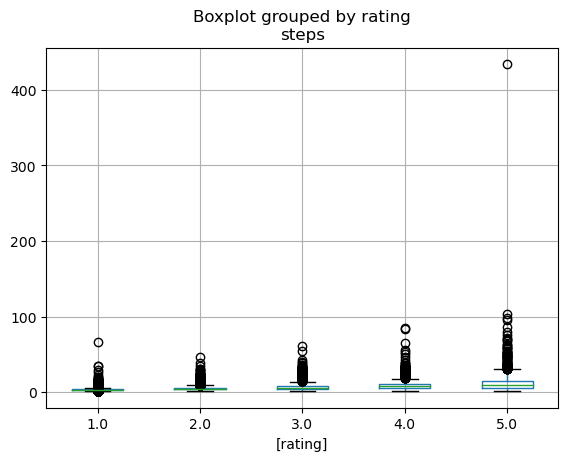

In [8]:
print('Average steps for each rating')
for i in range(5):
    print('rating =',i+1)
    print('number:',df_rate[df_rate.rating == i+1].steps.count(), 'mean:',df_rate[df_rate.rating == i+1].steps.mean())

# df_rate.plot.scatter(x='steps', y='rating')
df_rate.boxplot(column=['steps'], by=['rating'])

<AxesSubplot:title={'center':'steps'}, xlabel='[rating]'>

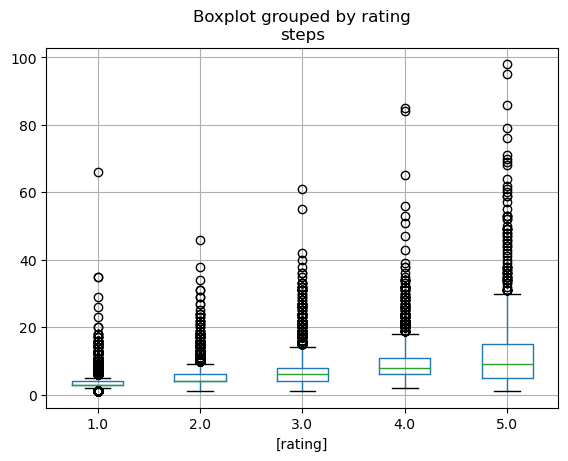

In [9]:
# get rid of outlier
df_rate = df_rate.drop(df_rate[df_rate.steps == 0].index, axis = 0)
df_rate = df_rate.drop(df_rate[df_rate.steps > 100].index, axis = 0)
df_rate.boxplot(column=['steps'], by=['rating'])

In [10]:
## read catagory

fname = os.path.join(PATH_IN, 'wikispeedia_paths-and-graph/categories.tsv')
catagories = pd.read_csv(fname, sep = '\t', comment = '#', header = None, names = ['articles','catagory'], encoding = 'UTF-8')
(catagories.apply(lambda x:x.catagory.split('.')[0], axis = 1)).describe()

count        5204
unique          1
top       subject
freq         5204
dtype: object

In [11]:
catagories.catagory = catagories.apply(lambda x:x.catagory.split('.')[1], axis = 1)
catagories

,articles,catagory
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,History
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People
2,%C3%85land,Countries
3,%C3%85land,Geography
4,%C3%89douard_Manet,People
...,...,...
5199,Zirconium,Science
5200,Zoroaster,People
5201,Zuid-Gelders,Geography
5202,Zuid-Gelders,Language_and_literature


In [16]:
## count catagories

catagory_values = catagories['catagory'].value_counts(sort = True)
catagory_values

Science                    1122
Geography                  1084
People                      689
History                     545
Everyday_life               374
Design_and_Technology       254
Countries                   229
Citizenship                 224
Language_and_literature     196
Religion                    134
Music                        97
Business_Studies             88
IT                           85
Mathematics                  45
Art                          38
Name: catagory, dtype: int64

In [20]:
# delete the '0' and '1' path and outliers
df = df.drop(df[df.steps == 0].index, axis = 0)
df = df.drop(df[df.steps == 1].index, axis = 0)

In [21]:
## Find the start, end and first choose articles in paths
df['start'] = df.apply(lambda x:x.path.split(';')[0], axis = 1)
df['first_choise'] = df.apply(lambda x:x.path.split(';')[1], axis = 1)
df['end'] = df.apply(lambda x:x.path.split(';')[-1], axis = 1)
df

,hashedIpAddress,timestamp,durationInSec,path,rating,steps,start,first_choise,end
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,8,14th_century,15th_century,African_slave_trade
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,4,14th_century,Europe,African_slave_trade
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,7,14th_century,Niger,African_slave_trade
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,3,14th_century,Renaissance,Greece
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,6,14th_century,Italy,John_F._Kennedy
...,...,...,...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN,2,Yagan,Ancient_Egypt,Civilization
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,8,Yagan,Folklore,Fiction
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN,6,Yagan,Australia,U.S._Open_%28tennis%29
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0,3,Yarralumla%2C_Australian_Capital_Territory,Australia,Abraham_Lincoln


In [22]:
## add catogory info to df

df_catagory = pd.merge(df, catagories,left_on='first_choise', right_on='articles')
df_catagory['first_catagory'] = df_catagory['catagory']
df_catagory = df_catagory.drop(['catagory','articles'], axis = 1)

df_catagory

,hashedIpAddress,timestamp,durationInSec,path,rating,steps,start,first_choise,end,first_catagory
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,8,14th_century,15th_century,African_slave_trade,History
1,08888b1b428dd90e,1232241601,167,14th_century;15th_century;Plato;Nature;Ultravi...,NaN,6,14th_century,15th_century,Rainbow,History
2,70ba2fcf0b7e75ed,1372558746,193,14th_century;15th_century;16th_century;Science...,3.0,5,14th_century,15th_century,Sodium,History
3,04d3b8897282b485,1299530465,64,Beer;15th_century;France;World_War_II,NaN,3,Beer,15th_century,World_War_II,History
4,7fca1ad50f69e869,1249638549,64,English_language;15th_century;Henry_VII_of_Eng...,3.0,3,English_language,15th_century,Edward_VI_of_England,History
...,...,...,...,...,...,...,...,...,...,...
66606,144ffcb41a50ab84,1360825570,88,Saint_Joan_%28play%29;Joan_of_Arc;Hundred_Year...,NaN,6,Saint_Joan_%28play%29,Joan_of_Arc,Renaissance,People
66607,4c664c681f6fb04b,1384998606,50,Saint_Joan_%28play%29;Joan_of_Arc;Henry_VIII_o...,NaN,3,Saint_Joan_%28play%29,Joan_of_Arc,Edward_VI_of_England,People
66608,74a8c22c52e1792f,1331772052,146,Squash_%28sport%29;Hardball_squash;United_Stat...,NaN,9,Squash_%28sport%29,Hardball_squash,India,Everyday_life
66609,7576960a4fc39eea,1340901874,265,War_in_Somalia_%282006%E2%80%93present%29;Erit...,3.0,5,War_in_Somalia_%282006%E2%80%93present%29,Eritrea,Star,Geography


In [23]:
## first choise catagories

click_count1 = df_catagory['first_catagory'].value_counts(sort = True)
click_count1

Geography                  24322
Countries                  12102
Science                    10292
History                     4913
Citizenship                 2848
Everyday_life               2628
Language_and_literature     2265
People                      2238
Religion                    1485
IT                          1068
Design_and_Technology        790
Business_Studies             733
Music                        349
Mathematics                  330
Art                          248
Name: first_catagory, dtype: int64

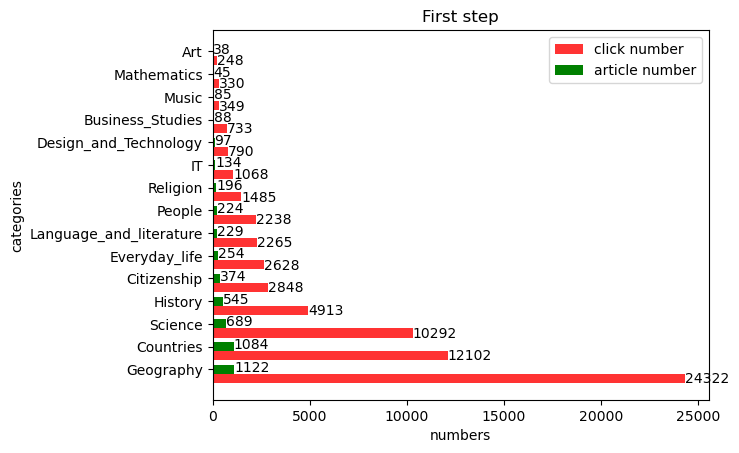

In [24]:
y = range(len(click_count1))

rects1 = plt.barh(y=y, width = click_count1, height=0.4, alpha=0.8, color='red', label="click number")
rects2 = plt.barh(y=[i + 0.4 for i in y], width=catagory_values, height=0.4, color='green', label="article number")

plt.xlabel("numbers")

plt.yticks([index + 0.4 for index in y], click_count1.index)
plt.ylabel("categories")
plt.title("First step")
plt.legend()

for rect in rects1:
    width = rect.get_width()
    plt.text(width, rect.get_y() + rect.get_height() / 2 -0.2, str(width))
for rect in rects2:
    width = rect.get_width()
    plt.text(width, rect.get_y() + rect.get_height() / 2 -0.1, str(width))
plt.show()




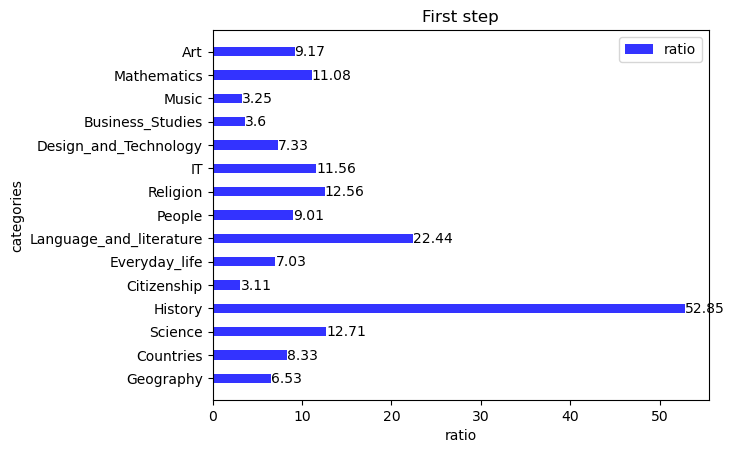

In [25]:
# ratio

rects3 = plt.barh(y=y, width = round(click_count1/catagory_values,2), height=0.4, alpha=0.8, color='blue', label="ratio")
plt.xlabel("ratio")

plt.yticks([index  for index in y], click_count1.index)
plt.ylabel("categories")
plt.title("First step")
plt.legend()

for rect in rects3:
    width = rect.get_width()
    plt.text(width, rect.get_y() + rect.get_height() / 2 -0.2, str(width))

plt.show()

In [26]:

## add catogory info to df

df_catagory1 = pd.merge(df_catagory, catagories,left_on='start', right_on='articles')
df_catagory1['start_catagory'] = df_catagory1['catagory']
df_catagory1 = df_catagory1.drop(['catagory','articles'], axis = 1)

df_catagory1['start-first'] = df_catagory1['start_catagory'].str.cat(';' + df_catagory1['first_catagory'])

click_count2 = df_catagory1['start-first'].value_counts(sort = True)
click_count2


Science;Science              7163
Geography;Geography          6929
Science;Geography            5149
People;Geography             3177
Everyday_life;Geography      2916
                             ... 
Art;IT                          2
Music;Mathematics               1
Business_Studies;Religion       1
IT;Religion                     1
Religion;IT                     1
Name: start-first, Length: 221, dtype: int64

In [27]:
df_catagory2 = pd.merge(df_catagory, catagories,left_on='end', right_on='articles')
df_catagory2['end_catagory'] = df_catagory2['catagory']
df_catagory2 = df_catagory2.drop(['catagory','articles'], axis = 1)


df_catagory2['first-end'] = df_catagory2['first_catagory'].str.cat(';' + df_catagory2['end_catagory'])


click_count3 = df_catagory2['first-end'].value_counts(sort = True)
click_count3

Geography;Geography             8019
Geography;Science               6007
Science;Science                 4460
Countries;Geography             3793
Geography;People                3068
                                ... 
Music;Business_Studies             4
Business_Studies;Art               4
IT;Art                             3
Mathematics;Business_Studies       3
Mathematics;Art                    1
Name: first-end, Length: 225, dtype: int64

In [ ]:
################################################################################
################################################################################
## analyeze with 'categories.tsv'

In [28]:
## Reading the 'categories.tsv' file as a pandas dataframe
PATH_IN = './data/'
fname = os.path.join(PATH_IN, 'wikispeedia_paths-and-graph/categories.tsv')
df_cate = pd.read_csv(fname, sep = '\t', comment = '#', header = None, names = ['articles','categories'],encoding = 'UTF-8')
df_cate


,articles,categories
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


subject.Countries                                       229
subject.Science.Biology.Birds                           161
subject.Geography.Geography_of_Great_Britain            124
subject.Science.Chemistry.Chemical_elements             119
subject.Science.Biology.Mammals                         114
                                                       ... 
subject.Geography.Antarctica                              8
subject.People.Chemists                                   8
subject.People.Producers_directors_and_media_figures      8
subject.IT.Cryptography                                   6
subject.Art.Artists                                       2
Name: categories, Length: 129, dtype: int64

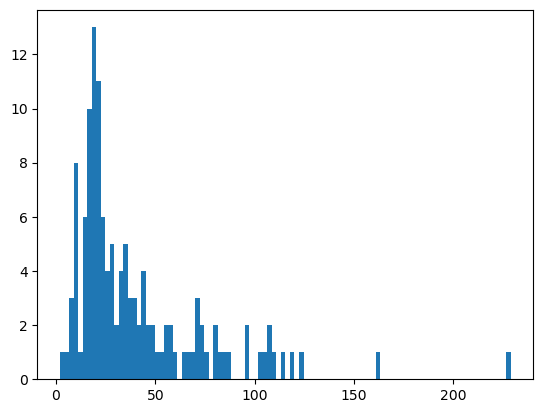

In [29]:
## how many categories

category_list = df_cate['categories'].value_counts()
plt.hist(category_list,100)
category_list

In [30]:
df_cate.loc[:,'subcat_num'] = df_cate.apply(lambda x:x.categories.count('.'),axis = 1)
df_cate

,articles,categories,subcat_num
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,3
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,2
2,%C3%85land,subject.Countries,1
3,%C3%85land,subject.Geography.European_Geography.European_...,3
4,%C3%89douard_Manet,subject.People.Artists,2
...,...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements,3
5200,Zoroaster,subject.People.Religious_figures_and_leaders,2
5201,Zuid-Gelders,subject.Geography.European_Geography,2
5202,Zuid-Gelders,subject.Language_and_literature.Languages,2


In [31]:
## Reading the 'articles.tsv' file as a pandas dataframe
PATH_IN = './data/'
fname = os.path.join(PATH_IN, 'wikispeedia_paths-and-graph/articles.tsv')
df_article = pd.read_csv(fname, sep = '\t', comment = '#', header = None, names = ['articles'],encoding = 'UTF-8')
df_article


,articles
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts
...,...
4599,Zionism
4600,Zirconium
4601,Zoroaster
4602,Zuid-Gelders


In [32]:
## label every article

df_article = pd.merge(df_article, df_cate, how = 'outer')
df_article

,articles,categories,subcat_num
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,3.0
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,2.0
2,%C3%85land,subject.Countries,1.0
3,%C3%85land,subject.Geography.European_Geography.European_...,3.0
4,%C3%89douard_Manet,subject.People.Artists,2.0
...,...,...,...
5205,Zirconium,subject.Science.Chemistry.Chemical_elements,3.0
5206,Zoroaster,subject.People.Religious_figures_and_leaders,2.0
5207,Zuid-Gelders,subject.Geography.European_Geography,2.0
5208,Zuid-Gelders,subject.Language_and_literature.Languages,2.0


In [33]:
# find articles without categories
df_article[df_article.isnull().T.any()]

,articles,categories,subcat_num
1360,Directdebit,NaN,NaN
1385,Donation,NaN,NaN
1811,Friend_Directdebit,NaN,NaN
3670,Pikachu,NaN,NaN
4342,Sponsorship_Directdebit,NaN,NaN
5141,Wowpurchase,NaN,NaN


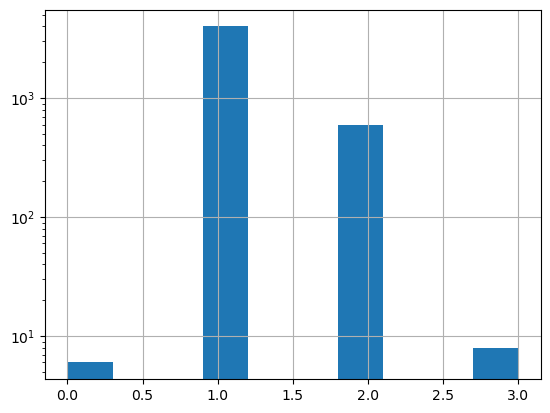

In [34]:
# find articles with multiple categories
dup_cate_list = df_article.articles.value_counts()

# modify no category articles
dup_cate_list[df_article[df_article.isnull().T.any()].articles] = 0
dup_cate_list.hist()
plt.yscale('log')
plt.show()

In [35]:
df_cate.describe()

,subcat_num
count,5204.000000
mean,2.232129
std,0.532544
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [36]:
category_list1 = df_cate[df_cate['subcat_num']==1].categories.value_counts()
category_list1

subject.Countries      229
subject.Mathematics     45
Name: categories, dtype: int64

In [37]:
category_list2 = df_cate[df_cate['subcat_num']==2].categories.value_counts()
category_list2

subject.Geography.Geography_of_Great_Britain            124
subject.People.Historical_figures                       108
subject.Geography.North_American_Geography              103
subject.Everyday_life.Food_and_agriculture               97
subject.Citizenship.Politics_and_government              97
                                                       ... 
subject.Geography.Antarctica                              8
subject.People.Producers_directors_and_media_figures      8
subject.People.Chemists                                   8
subject.IT.Cryptography                                   6
subject.Art.Artists                                       2
Name: categories, Length: 100, dtype: int64

In [38]:
category_list3 = df_cate[df_cate['subcat_num']==3].categories.value_counts()
category_list3

subject.Science.Biology.Birds                                                                  161
subject.Science.Chemistry.Chemical_elements                                                    119
subject.Science.Biology.Mammals                                                                114
subject.Science.Biology.Health_and_medicine                                                    109
subject.Science.Biology.Plants                                                                 108
subject.Science.Physics.Space_Astronomy                                                        105
subject.History.British_History.British_History_1500_and_before_including_Roman_Britain         73
subject.Science.Biology.Insects_Reptiles_and_Fish                                               72
subject.Science.Biology.Dinosaurs                                                               59
subject.Geography.African_Geography.African_Countries                                           57
subject.Ge

In [ ]:
################################################################################
################################################################################
## analyeze with 'paths_unfinished.tsv'

In [63]:
## Reading the 'paths_unfinished.tsv' file as a pandas dataframe
PATH_IN = './data/'
fname = os.path.join(PATH_IN, 'wikispeedia_paths-and-graph/paths_unfinished.tsv')
df_unfini = pd.read_csv(fname, sep = '\t', comment = '#', header = None, names = ['hashedIpAddress','timestamp','durationInSec','path','target','type'],encoding = 'UTF-8')
df_unfini

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


In [64]:
# different number of reason for unfinished
df_unfini.type.value_counts()

restart    15552
timeout     9323
Name: type, dtype: int64

In [65]:
# count steps
df_unfini['steps'] = df_unfini.apply(lambda x:x.path.count(';'),axis = 1)
df_unfini

,hashedIpAddress,timestamp,durationInSec,path,target,type,steps
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout,0
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout,0
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout,2
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart,0
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout,1
...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart,7
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart,0
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout,4
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout,3


In [66]:
# the start and target pair players restart without trying
df_restart0 = df_unfini[(df_unfini.type == 'restart') & (df_unfini.steps == 0)]
df_restart0

,hashedIpAddress,timestamp,durationInSec,path,target,type,steps
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart,0
8,6d136e371e42474f,1297102100,19,Logic,Moon_landing,restart,0
11,05dc2fbd5fc8d375,1297135100,8,Niobium,Beeching_Axe,restart,0
15,5900aa2d71b99153,1297138883,22,Prostate_cancer,Du_Fu,restart,0
20,3786d9852b814082,1297152708,13,Snowball_Earth,Medal_of_Honor,restart,0
...,...,...,...,...,...,...,...
24838,2f29eb28788513de,1389710225,16,International_law,Cyberpunk,restart,0
24844,0242716e1c151c2b,1389718654,16,Diplodocus,Meningitis,restart,0
24849,4531d5b95d45e3b2,1389741844,10,London,Shanghai,restart,0
24854,349e3b7f39825200,1389774373,7,Indonesia,List_of_areas_in_the_National_Park_System_of_t...,restart,0


In [67]:
df_restart0.target.value_counts()

Telephone                     113
Zebra                         105
Viking                         66
Bean                           62
Adolf_Hitler                   26
                             ... 
Saint_Lucia                     1
Mammoth_Cave_National_Park      1
Down_syndrome                   1
Vanilla                         1
Hollandic                       1
Name: target, Length: 1739, dtype: int64

In [75]:
df_restart0['start-target'] = df_restart0['path'] + ';' + df_restart0['target']
df_restart0['start-target'].value_counts()

/var/folders/wt/k495632s6n3d1yq6x4017h_80000gn/T/ipykernel_78966/3188929257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restart0['start-target'] = df_restart0['path'] + ';' + df_restart0['target']


Brain;Telephone                 109
Theatre;Zebra                   103
Asteroid;Viking                  66
Pyramid;Bean                     61
Batman;Penguin                   16
                               ... 
Batman;Sony                       1
Saturn_V;Split_infinitive         1
Barbados;Luminiferous_aether      1
Internet;Tijuana                  1
Modern_history;Hollandic          1
Name: start-target, Length: 2684, dtype: int64

In [76]:
# delete the abnormal data(step = 0)
df_unfini = df_unfini[df_unfini.steps != 0]
df_unfini

,hashedIpAddress,timestamp,durationInSec,path,target,type,steps
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout,2
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout,1
5,131600803df4895e,1297100557,2009,Agriculture;History_of_the_world;China;Yangtze...,Grand_Canal_of_China,timeout,3
6,486bb79910fe9dd2,1297101660,1932,Mind;Christianity;Europe;Renaissance;Ancient_G...,Scouting,timeout,6
7,6d136e371e42474f,1297102070,175,4-2-0;United_States;Agriculture;Sugar;Australia,Cane_Toad,restart,4
...,...,...,...,...,...,...,...
24869,109ed71f571d86e9,1389787212,182,Turks_and_Caicos_Islands;United_States;Iraq;Un...,Iraq_War,restart,5
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart,7
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout,4
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout,3


type: timeout
number: 7314 mean: 5.253759912496582
type: restart
number: 12347 mean: 5.344942091196242


<AxesSubplot:title={'center':'steps'}, xlabel='[type]'>

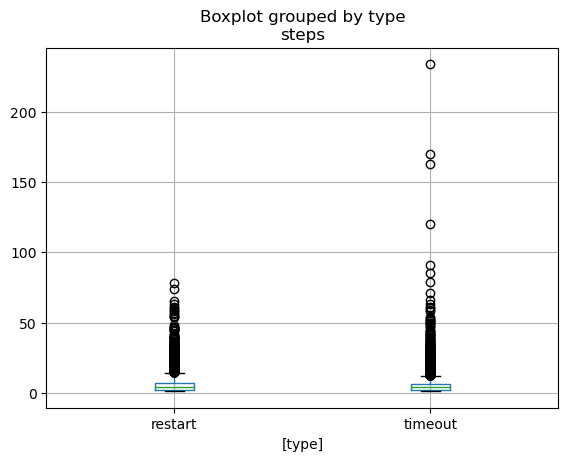

In [77]:
print('type: timeout')
print('number:',df_unfini[df_unfini.type == 'timeout'].steps.count(), 'mean:',df_unfini[df_unfini.type == 'timeout'].steps.mean())
print('type: restart')
print('number:',df_unfini[df_unfini.type == 'restart'].steps.count(), 'mean:',df_unfini[df_unfini.type == 'restart'].steps.mean())
df_unfini.boxplot(column=['steps'], by=['type'])